**A.5 Implementing multilayer neural networks**

Next, we focus on PyTorch as a library for implementing deep neural networks. To provide a concrete example, let’s look at a multilayer perceptron, a fully connected neural network, as illustrated in figure below:

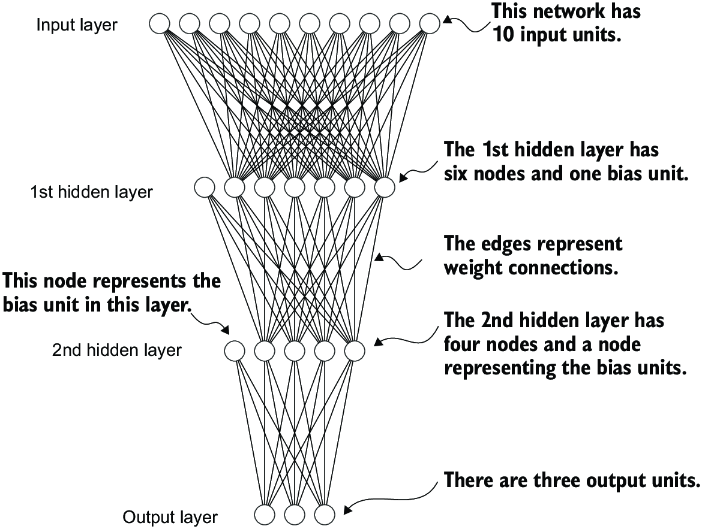

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Data science/Build a Large Language Model (From Scratch)/Pytorch/images/multilayer_perceptron.png')

<img src='https://drive.google.com/file/d/1Vchi3Km_BnG26AdDukJyQQmS_AYRspls/view?usp=drive_link' alt=" A multilayer perceptron with two hidden layers. Each node represents a unit in the respective layer. For illustration purposes, each layer has a very small number of nodes."/>


When implementing a neural network in PyTorch, we can subclass the `torch.nn.Module` class to define our own custom network architecture. This `Module` base class provides a lot of functionality, making it easier to build and train models. For instance, it allows us to encapsulate layers and operations and keep track of the model’s parameters.

Within this subclass, we define the network layers in the `__init__` constructor and specify how the layers interact in the forward method. The forward method describes how the input data passes through the network and comes together as a computation graph. In contrast, the backward method, which we typically do not need to implement ourselves, is used during training to compute gradients of the loss function given the model parameters. The code in the following listing implements a classic multilayer perceptron with two hidden layers to illustrate a typical usage of the `Module` class.

In [3]:
# A multilayer perceptron with two hidden layers
import torch


# `NeuralNetwork` is a class that inherits from t`orch.nn.Module`. All neural
# network models in PyTorch must inherit from `torch.nn.Module` to leverage the
# built-in functionality for layers, forward passes, parameter updates, etc.

# `torch.nn.Module` is a base class for all neural network modules in PyTorch.
# It contains essential functionality like automatic gradient calculation and
#  model management.

class NeuralNetwork(torch.nn.Module):
  # Coding the number of inputs and outputs as variables allows us to reuse
  # the same code for datasets with different numbers of features and classes.
  # `num_inputs` and `num_outputs` are the parameters for the network's input
  # size (number of features) and output size (number of classes or regression
  # targets).

  # The `__init__` method is the constructor for the class. It is called when an
  # instance of the `NeuralNetwork` class is created.

  def __init__(self, num_inputs, num_outputs):
    super().__init__() # `super().__init__()` calls the constructor of the parent
    # class (torch.nn.Module) so that PyTorch can set up some internal
    # structures required for the module to function properly.

    # The `self.layers` attribute is defined using `torch.nn.Sequential`, which
    # is a simple way to stack layers in a neural network. Layers are executed
    # in the order they are added to this module.
    self.layers = torch.nn.Sequential(

        # First hidden layers
        # The Linear layer takes the number of input and output nodes as
        # arguments. `torch.nn.Linear(num_inputs, 30)` is a fully connected
        # layer (also known as a dense layer). It takes `num_inputs` as the
        # number of features in the input, and outputs 30 values. The number 30
        # refers to the number of neurons in the first hidden layer.
        torch.nn.Linear(num_inputs, 30),

        # Nonlinear activation functions are placed between the hidden layers.
        # `torch.nn.ReLU()` applies the ReLU activation function to the output
        # of the linear layer. ReLU introduces non-linearity by setting all
        # negative values to zero and leaving positive values unchanged.
        torch.nn.ReLU(),

        # Second hidden layer
        # The number of output nodes of one hidden layer has to match the number
        # of inputs of the next layer.
        torch.nn.Linear(30, 20),
        torch.nn.ReLU(),

        # Output layer
        # The value of num_outputs depends on the problem: for binary
        # classification, num_outputs would be 1, for multi-class classification
        # it could be the number of classes, etc.
        torch.nn.Linear(20, num_outputs),

    )

  # The forward method defines how the input x passes through the layers of the
  # network. In PyTorch, the forward pass is the function that describes how
  # data flows through the network, from the input to the output.

  # x is the input to the network (usually a tensor of shape
  # (batch_size, num_inputs)).


  def forward(self, x):
    # The outputs of the last layer are called logits.`logits = self.layers(x)`
    # applies the Sequential layers (defined in the __init__ method) to the
    # input x. This means the input goes through the first linear layer,
    # followed by ReLU, then the second linear layer, followed by another ReLU,
    # and finally through the output layer.

    # `logits` is the output of the network, which typically represents raw
    #  scores (often referred to as logits) before applying an activation
    # function like softmax (for classification tasks).
    logits = self.layers(x)
    return logits


We can then instantiate a new neural network object as follows:

In [4]:
model = NeuralNetwork(50, 3)

Before using this new `model` object, we can call `print` on the model to see a summary of its structure:

In [5]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


Note that we use the `Sequential` class when we implement the `NeuralNetwork` class. `Sequential` is not required, but it can make our life easier if we have a series of layers we want to execute in a specific order, as is the case here. This way, after instantiating `self.layers = Sequential(...)` in the `__init__` constructor, we just have to call the `self.layers` instead of calling each layer individually in the NeuralNetwork’s forward method.



Next, let’s check the total number of trainable parameters of this model:

In [7]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# `model.parameters()` is a method in PyTorch that returns an iterator over all
# the parameters of the model. These parameters include weights and biases for
# each layer in the model (e.g., weights for the Linear layers).

# `p.requires_grad` is a boolean flag that indicates whether the parameter p
# should be updated during training (i.e., whether its gradient should be
# computed during backpropagation). In PyTorch, parameters that are intended to
# be updated during training (e.g., weights and biases) have requires_grad=True.

# `p.numel()` returns the number of elements (i.e., the total number of values)
# in the parameter p. For example: If `p` is a tensor of shape `[30, 10]`,
# `p.numel()` will return 300 (because there are 300 elements in a 30x10 matrix).
# If `p` is a vector of shape `[30]` (like biases), `p.numel()` will return 30.

print(f"Number of trainable parameters: {num_params}")

Number of trainable parameters: 2213


In the case of our neural network model with the preceding two hidden layers, these trainable parameters are contained in the `torch.nn.Linear` layers. A `Linear` layer **multiplies** the **inputs** with a **weight matrix** and **adds** a **bias vector**. This is sometimes referred to as a `feedforward` or `fully connected layer`.

Based on the `print(model)` call we executed here, we can see that the first `Linear` layer is at index position `0` in the layers attribute. We can access the corresponding weight parameter matrix as follows:

In [10]:
print(model.layers[0].weight)

Parameter containing:
tensor([[ 0.0308, -0.0510, -0.0831,  ...,  0.0413, -0.0968, -0.0668],
        [ 0.1199,  0.0189,  0.0984,  ...,  0.0832,  0.1364,  0.0081],
        [ 0.1351,  0.0416, -0.0626,  ...,  0.0402, -0.0674,  0.0596],
        ...,
        [-0.0114, -0.0333, -0.0618,  ...,  0.0521, -0.0513,  0.0984],
        [-0.0851,  0.0420, -0.1227,  ...,  0.0372,  0.1004, -0.0181],
        [ 0.1048, -0.0956, -0.1212,  ..., -0.1183, -0.1402, -0.0515]],
       requires_grad=True)


In [12]:
model.layers[0].weight.shape

torch.Size([30, 50])

(Similarly, you could access the bias vector via `model.layers[0].bias`.

In [14]:
print(model.layers[0].bias)

Parameter containing:
tensor([ 0.0100, -0.0122,  0.0122, -0.0364, -0.1323,  0.1125, -0.0280,  0.0986,
         0.1034,  0.0639, -0.1106, -0.0318,  0.1294, -0.0251, -0.1264, -0.1182,
        -0.0304, -0.0927, -0.0654,  0.1058, -0.1263, -0.0585, -0.1194,  0.0152,
        -0.0562,  0.1388, -0.0856, -0.0440, -0.1362, -0.0008],
       requires_grad=True)


In [15]:
model.layers[0].bias.shape

torch.Size([30])

The weight matrix here is a `30 × 50` matrix, and we can see that `requires_grad` is set to `True`, which means its entries are trainable—this is the default setting for weights and biases in `torch.nn.Linear`.